# Code

In [ ]:
!pip install midiutil
!pip install pygame
!pip install pretty_midi

In [ ]:
import sonify
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from midiutil import MIDIFile

In [ ]:
from importlib import reload
reload(sonify)

In [ ]:
data = pd.read_csv("data/plasticc_train_lightcurves.csv.gz") 
dataMETA = pd.read_csv("data/plasticc_train_metadata.csv.gz")


In [ ]:
snFilt = dataMETA["true_target"].isin([62])
allSNIBC = dataMETA[snFilt]
idSNIBC = allSNIBC["object_id"].to_list()
filtData = data["object_id"].isin(idSNIBC)
SNIBCinData = data[filtData]

ebFilt = dataMETA["true_target"].isin([16])
allEB = dataMETA[ebFilt]
idEB = allEB['object_id'].to_list()
filtDataEB = data["object_id"].isin(idEB)
EBinData = data[filtDataEB]

In [ ]:
snMidList = []
for i in range(len(idSNIBC)):
    objData = SNIBCinData["object_id"].isin([idSNIBC[i]])
    obj = SNIBCinData[objData]

    idObj = obj["object_id"].values[0]
    maxFluxRow = obj["flux"].argmax()
    maxFlux = obj["flux"].values[maxFluxRow]

    gap = obj.loc[(obj['mjd'] >= 59900) & (obj['mjd'] <= 60100)]

    if gap.isin([maxFlux]).any().any() == True:
        snMidList.append(idObj)

In [ ]:
def plotObject(objectID, x0=None, x1=None, y0=None, y1=None):
    
    if allSNIBC.isin([objectID]).any().any() == True:
        objData = SNIBCinData["object_id"].isin([objectID])
        objFiltered = SNIBCinData[objData]
        timeValue = objFiltered["mjd"]
        fluxValue = objFiltered["flux"]
        plt.figure(figsize=(10, 3))
        plt.plot(timeValue, fluxValue, 'o', color = "black")
        if not (x0 is None) and not (x1 is None):
            plt.xlim(x0,x1)
        if not (y0 is None) and not (y1 is None):
            plt.ylim(y0,y1)

    if allEB.isin([objectID]).any().any() == True:
        objData = EBinData["object_id"].isin([objectID])
        objFiltered = EBinData[objData]
        timeValue = objFiltered["mjd"]
        fluxValue = objFiltered["flux"]
        plt.figure(figsize=(10, 3))
        plt.plot(timeValue, fluxValue, 'o', color = "black")
        if not (x0 is None) and not (x1 is None):
            plt.xlim(x0,x1)
        if not (y0 is None) and not (y1 is None):
            plt.ylim(y0,y1)

In [ ]:
def multiPlotObject(objectID):

    plt.figure(figsize=(10, 3))
    ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]

    if allSNIBC.isin([objectID]).any().any() == True:
        for i in range(6):
            objData = SNIBCinData["object_id"].isin([objectID])
            objFiltered = SNIBCinData[objData]

            objPfilt = objFiltered["passband"].isin([i])
            objP = objFiltered[objPfilt]
            timeValue = objP["mjd"]
            fluxValue = objP["flux"]
            plt.plot(timeValue,fluxValue, 'o', color = ugrizyC[i])

    if allEB.isin([objectID]).any().any() == True:
        for i in range(6):
            objData = EBinData["object_id"].isin([objectID])
            objFiltered = EBinData[objData]

            objPfilt = objFiltered["passband"].isin([i])
            objP = objFiltered[objPfilt]
            timeValue = objP["mjd"]
            fluxValue = objP["flux"]
            plt.plot(timeValue,fluxValue, 'o', color = ugrizyC[i])



    plt.title("ugrizy")
    plt.xlabel("Time (MJD)")
    plt.ylabel("Flux")

In [ ]:
def sonification(objectID):


    if allSNIBC.isin([objectID]).any().any() == True:
        objData = SNIBCinData["object_id"].isin([objectID])
        objFiltered = SNIBCinData[objData]
        timeValue = objFiltered["mjd"]
        fluxValue = objFiltered["flux"]


        x_points = timeValue
        y_points = fluxValue
        low_note=20
        high_note=100
        normalized_x = sonify.core.scale_list_to_range(x_points, new_min=0, new_max=30)
        normalized_y = sonify.core.scale_list_to_range(y_points, new_min=low_note, new_max=high_note)
                
        normed_data = list(zip(normalized_x, normalized_y))
        sonify.play_midi_from_data(normed_data, track_type='single', key='c_major')

    if allEB.isin([objectID]).any().any() == True:
        objData = EBinData["object_id"].isin([objectID])
        objFiltered = EBinData[objData]
        timeValue = objFiltered["mjd"]
        fluxValue = objFiltered["flux"]


        x_points = timeValue
        y_points = fluxValue
        low_note=20
        high_note=100
        normalized_x = sonify.core.scale_list_to_range(x_points, new_min=0, new_max=30)
        normalized_y = sonify.core.scale_list_to_range(y_points, new_min=low_note, new_max=high_note)
                
        normed_data = list(zip(normalized_x, normalized_y))
        sonify.play_midi_from_data(normed_data, track_type='single', key='c_major')



In [ ]:
def multiSonification(objectID):
    multiData = []

    if allSNIBC.isin([objectID]).any().any() == True:
        for i in range(6):
            objData = SNIBCinData["object_id"].isin([objectID])
            objFiltered = SNIBCinData[objData]
            objPfilt = objFiltered["passband"].isin([i])
            objP = objFiltered[objPfilt]
            timeValue = objP["mjd"]
            fluxValue = objP["flux"]
            scaled_x = sonify.scale_list_to_range(timeValue, new_min=0, new_max=30)
            scaled_y = sonify.scale_list_to_range(fluxValue, new_min=0, new_max=30)
            quantized_x = sonify.quantize_x_value(scaled_x)
            multiData.append(list(zip(quantized_x, scaled_y)))
    

    if allEB.isin([objectID]).any().any() == True:
        for i in range(6):
            objData = EBinData["object_id"].isin([objectID])
            objFiltered = EBinData[objData]
            objPfilt = objFiltered["passband"].isin([i])
            objP = objFiltered[objPfilt]
            timeValue = objP["mjd"]
            fluxValue = objP["flux"]
            scaled_x = sonify.scale_list_to_range(timeValue, new_min=0, new_max=30)
            scaled_y = sonify.scale_list_to_range(fluxValue, new_min=0, new_max=30)
            quantized_x = sonify.quantize_x_value(scaled_x)
            multiData.append(list(zip(quantized_x, scaled_y)))
    
    
    instruments_to_add = [
    'steel drums', 'rock organ', 'pizzicato strings', 'oboe', 'ocarina','violin'
    ]
    multiDataWIntsruments = []
    for index, track in enumerate(multiData):
        multiDataWIntsruments.append([instruments_to_add[index]] + track)
    
    sonify.play_midi_from_data(multiDataWIntsruments, track_type='multiple', key='c_major')



# Plots and Sonifications

## Supernova Type Ibc:

----

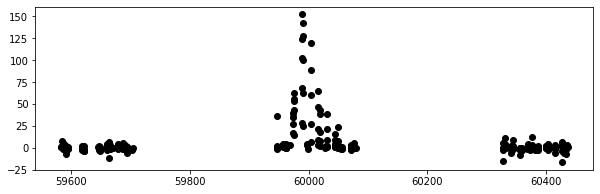

In [122]:
plotObject(287556)

In [ ]:
sonification(287556)

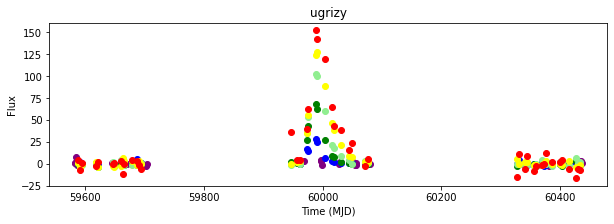

In [123]:
multiPlotObject(287556)

In [ ]:
multiSonification(287556)

----

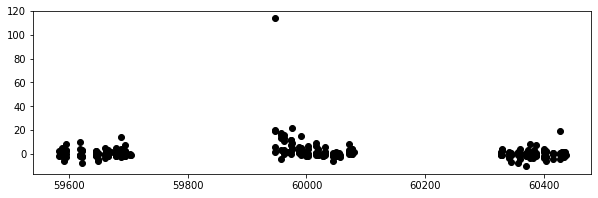

In [124]:
plotObject(119647)

In [ ]:
sonification(119647)

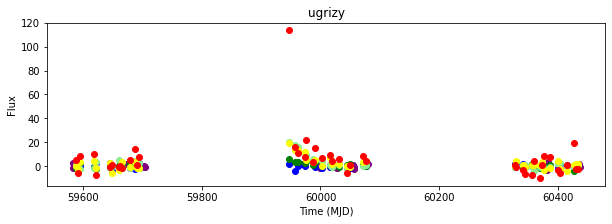

In [125]:
multiPlotObject(119647)

In [ ]:
multiSonification(119647)

----

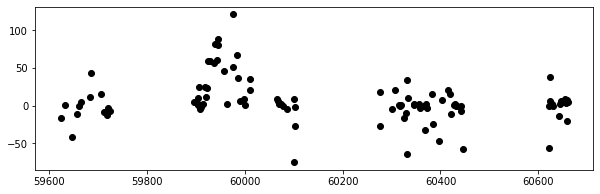

In [126]:
plotObject(5515915)

In [ ]:
sonification(5515915)

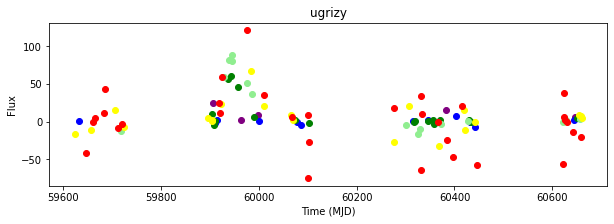

In [127]:
multiPlotObject(5515915)

In [ ]:
multiSonification(5515915)

----

## Eclipsing Binary stars

----

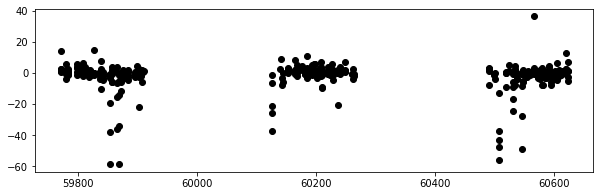

In [128]:
plotObject(7566)

In [ ]:
sonification(7566)

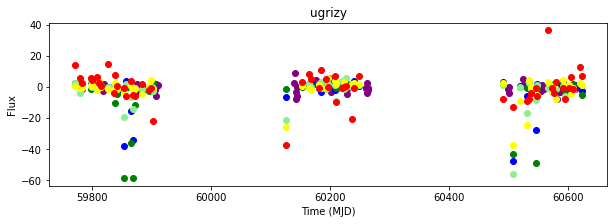

In [129]:
multiPlotObject(7566)

In [ ]:
multiSonification(7566)

----

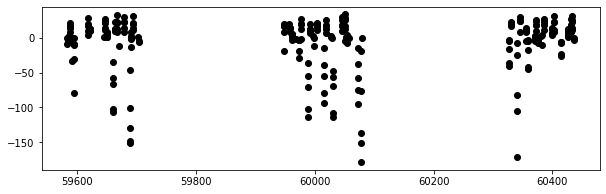

In [130]:
plotObject(45203)

In [ ]:
sonification(45203)

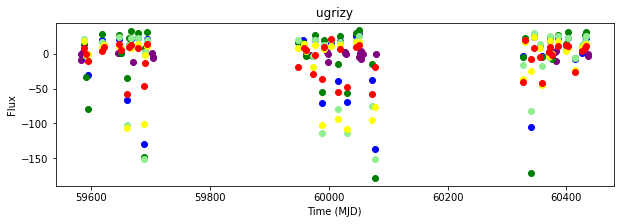

In [131]:
multiPlotObject(45203)

In [ ]:
multiSonification(45203)

----